# Business Problem

A house buyer assigns me a task about the house in King County. He wants to buy a house in this area but doesn't have any ideas about the housing market. And he has some preferred features in his mind, he wants to have a predicted price so that he can prepare for that.

# Plan

In this business problem, I will use King County House Sales dataset to analyze. Base on this situation, I am planning give him a overview about the house market and show him some important features that need to concern about. Next, I will dig into how the footage of the home(sqft_living) affect the price. Base on the features we get above, I will give some suggestions on selecting which neighborhood to invest. At last, I will make a prediction of price with his prefer features using model. Therefore, I divide this issue into four parts.

### What features do he need to concern about?
    * Find the most related features with the price.
### How the footage of the home (sqft_living) affect the price?
    * Find the correlation between them and the regression model.
### Which neighborhood is better to invest and which should avoid?
    * Find the neighborhood by grade, price, year built sorting
### How much should he prepare for the dream house?
    * Find the prediction of price with model.

# EDA (Exploratory data analysis)

## Import and Preview

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv("/Users/jrchen/flatiron-ds-course/Milestones/dsc-phase-2-project-online/Phase-2-Project/data/clean_data.csv")

### Column Names and descriptions for Kings County Data Set

id - unique identified for a house\
dateDate - house was sold\
pricePrice - is prediction target\
bedroomsNumber - of Bedrooms/House\
bathroomsNumber - of bathrooms/bedrooms\
sqft_livingsquare - footage of the home\
sqft_lotsquare - footage of the lot\
floorsTotal - floors (levels) in house\
waterfront - House which has a view to a waterfront\
view - Has been viewed\
condition - How good the condition is ( Overall )\
grade - overall grade given to the housing unit, based on King County grading system\
sqft_above - square footage of house apart from basement\
sqft_basement - square footage of the basement\
yr_built - Built Year\
yr_renovated - Year when house was renovated\
zipcode - zip\
lat - Latitude coordinate\
long - Longitude coordinate\
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors\
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df.drop(columns=['Unnamed: 0', 'id', 'date'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,basement_exist,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000.0,4,3.0,1960,5000,1.0,5,7,1050,1.0,1965,98136,47.5208,-122.393,1360,5000
1,510000.0,3,2.0,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
2,229500.0,3,1.0,1780,7470,1.0,3,7,1050,1.0,1960,98146,47.5123,-122.337,1780,8113
3,323000.0,3,2.5,1890,6560,2.0,3,7,1890,0.0,2003,98038,47.3684,-122.031,2390,7570
4,468000.0,2,1.0,1160,6000,1.0,4,7,860,1.0,1942,98115,47.6900,-122.292,1330,6000


## Q1: Most Related Features
    Find the most related features with the price.

### Heatmap

In [4]:
# drop some unmeaningful features
corr = df.drop(columns=['lat', 'long']).corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,basement_exist,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.214323,0.311205,0.482226,-0.103338,0.202976,0.107599,0.492610,0.360844,0.195641,-0.070664,0.019162,0.397930,-0.114688
bedrooms,0.214323,1.000000,0.436104,0.618380,0.219435,0.102943,0.041437,0.270025,0.469946,0.137732,0.132118,-0.178410,0.402405,0.207105
bathrooms,0.311205,0.436104,1.000000,0.656134,-0.086872,0.501724,-0.139527,0.563841,0.571460,0.144705,0.575255,-0.232085,0.489393,-0.094423
sqft_living,0.482226,0.618380,0.656134,1.000000,0.183101,0.268906,-0.031015,0.590063,0.786529,0.231136,0.295725,-0.226205,0.690557,0.164564
sqft_lot,-0.103338,0.219435,-0.086872,0.183101,1.000000,-0.439124,0.154619,-0.043543,0.124959,-0.021787,-0.102260,-0.264931,0.220519,0.880619
floors,0.202976,0.102943,0.501724,0.268906,-0.439124,1.000000,-0.288480,0.459848,0.505797,-0.278165,0.530739,-0.046890,0.212493,-0.451579
condition,0.107599,0.041437,-0.139527,-0.031015,0.154619,-0.288480,1.000000,-0.176793,-0.160798,0.114455,-0.398609,-0.009633,-0.104246,0.159642
grade,0.492610,0.270025,0.563841,0.590063,-0.043543,0.459848,-0.176793,1.000000,0.617013,0.001998,0.488026,-0.202482,0.581255,-0.039026
sqft_above,0.360844,0.469946,0.571460,0.786529,0.124959,0.505797,-0.160798,0.617013,1.000000,-0.325537,0.436859,-0.308368,0.663008,0.108971
basement_exist,0.195641,0.137732,0.144705,0.231136,-0.021787,-0.278165,0.114455,0.001998,-0.325537,1.000000,-0.157186,0.156164,0.016445,-0.023665


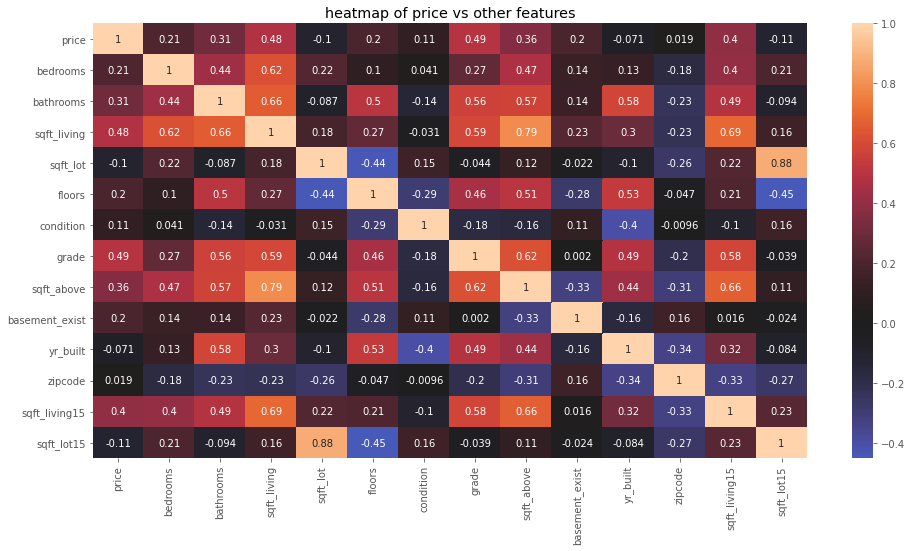

In [5]:
# transfer to a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corr, center=0, annot=True);
plt.title('heatmap of price vs other features')
plt.show()

In [6]:
# sort the corr into a list
corr_dict = {}
for i in corr.columns:
    corr_dict[i] = corr[i]['price']
sort_orders = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('price', 1.0),
 ('grade', 0.49261027416442066),
 ('sqft_living', 0.48222641077964523),
 ('sqft_living15', 0.3979299346232877),
 ('sqft_above', 0.36084369884935624),
 ('bathrooms', 0.3112049323614764),
 ('bedrooms', 0.21432266736607247),
 ('floors', 0.20297606726310086),
 ('basement_exist', 0.19564092494704588),
 ('condition', 0.10759942018093975),
 ('zipcode', 0.019162250231750035),
 ('yr_built', -0.07066375804244265),
 ('sqft_lot', -0.10333797300264337),
 ('sqft_lot15', -0.1146877232085822)]

From the heatmap and corr sorted list above, we can find the top related features with price. And these columns are grade, sqft_living, sqft_living15, sqft_above, bathrooms. However, the cc here of them are not to big which means they are not so related with price.

### Conclusion
The most related features with price are grade, sqft_living, sqft_living15, sqft_above, bathrooms.\
We also can say that the price is most related to the house area and living environment.

## Q2: Home Size Effect
    Find the correlation between price and sqft_living and make the regression model.

In [7]:
# select features for analyzing
selceted_features = ['price', 'sqft_living']
df_size = df[selceted_features]

In [8]:
df_size.corr()

,price,sqft_living
price,1.000000,0.482226
sqft_living,0.482226,1.000000


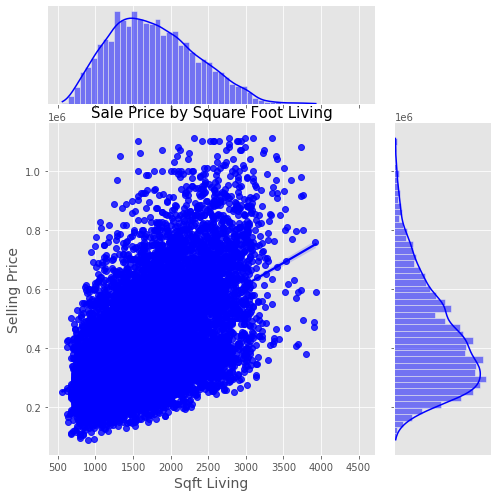

In [9]:
# graph plot
sns.jointplot(x = 'sqft_living', y = 'price' , data = df, kind = 'reg', height = 7, xlim = (370, 4720), 
              color = 'b', ratio = 3)
plt.title('Sale Price by Square Foot Living', fontsize = 15)
plt.ylabel('Selling Price', fontsize = 14)
plt.xlabel('Sqft Living', fontsize = 14)
plt.show()

In [10]:
# a function to build a model
def build_model(df, outcome):
    predictors = ' + '.join(df.drop(columns=[outcome]).columns)
    formula = outcome + ' ~ ' + predictors
    model = ols(formula=formula, data=df).fit()
    return model

In [11]:
# build the model and look at the summary
build_model(df[['price', 'sqft_living']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     3033.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:40:35   Log-Likelihood:            -1.3382e+05
No. Observations:               10013   AIC:                         2.676e+05
Df Residuals:                   10011   BIC:                         2.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      1.7e+05   5007.758     33.939      0.000     1.6e+05     1.8e+05
sqft_living   148.0812      2.689     55.076      0.000     142.811     153.352
==============================================================================
Omnibus:                      626.062   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.459
Skew:                           0.656   Prob(JB):                    4.91e-163
Kurtosis:                       3.266   Cond. No.                     6.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion
The correlation between sqft_living and price is around 0.233. It means they are light related. And also found that each sqft_living cost $148.08 by the coefficient.

## Q3: Neighborhood Selecting
    Find the neighborhood by grade, price, year built

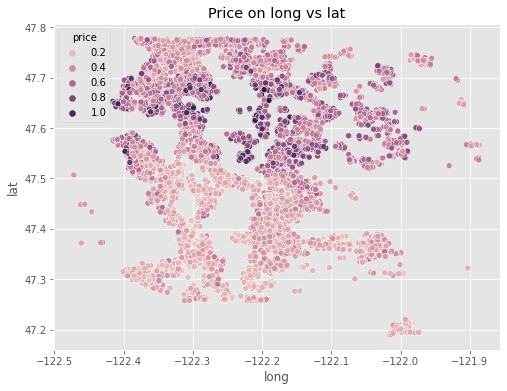

In [12]:
# preview the location and price
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['long'],
               y=df['lat'], 
                hue=df['price'], x_bins='auto')
plt.title('Price on long vs lat')
plt.show()

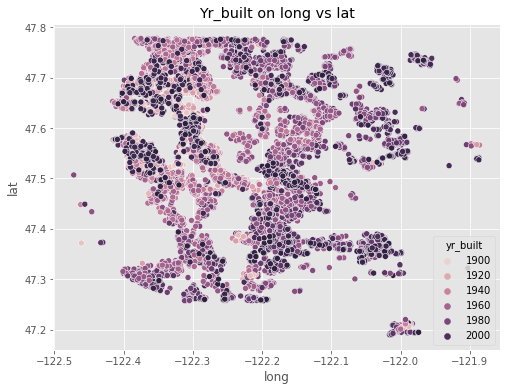

In [13]:
# preview the location and yr_built
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['long'],
               y=df['lat'], 
                hue=df['yr_built'], x_bins='auto')
plt.title('Yr_built on long vs lat')
plt.show()

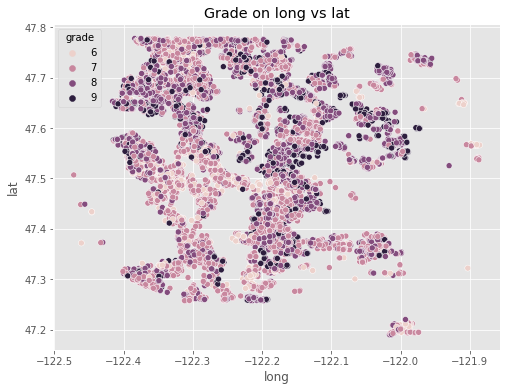

In [14]:
# preview the location and price
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['long'],
               y=df['lat'], 
                hue=df['grade'], x_bins='auto')
plt.title('Grade on long vs lat')
plt.show()

### Conclusion
    *High price: Bellevue, Newcastle      Low price: Federal Way, Kent
    *Old years: Seattle
    *High grade: Bellevue, Newcastle

## Q4: Prediction
    Find the prediction of price with model.

### Normalization

In [15]:
# Before doing the normalizaiton, let check the r square 
model = build_model(df, 'price')
model.rsquared

0.6449675491288918

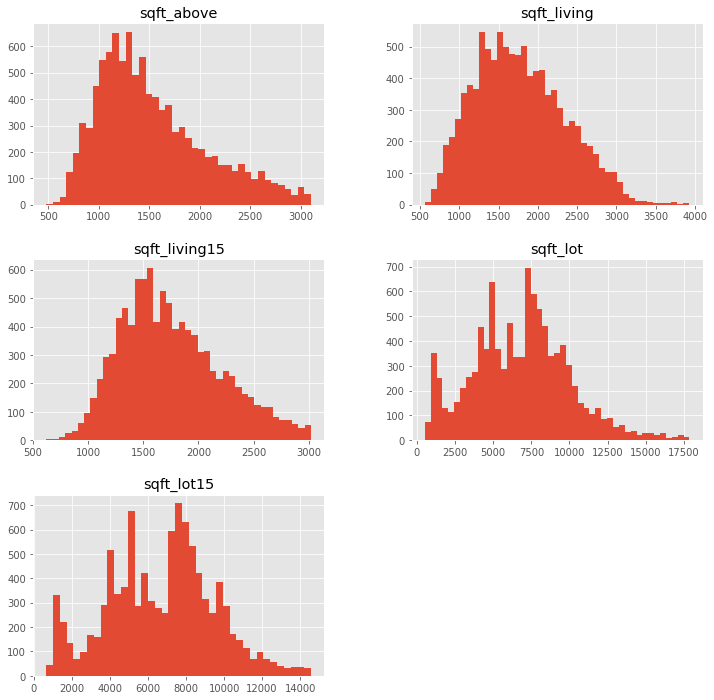

In [16]:
# Select non zero-inflated continuous features as df_cont base on the hist graph and other features stroe in df_others
df_cont = df[['sqft_living', 'sqft_lot',  'sqft_above',  'sqft_living15', 'sqft_lot15']]
df_int = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_built']]
df_cat = df['basement_exist']
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)
df_cont.hist(figsize=(12,12), bins='auto')
plt.show()

### Model 1: Non-transformation

In [17]:
df_final = pd.concat([df['price'], df_cont, df_int, df_cat, zip_dummies], axis=1)
df_final.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,condition,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,604000.0,1960,5000,1050,1360,5000,4,3.0,1.0,5,...,0,0,0,0,0,0,0,0,0,0
1,510000.0,1680,8080,1680,1800,7503,3,2.0,1.0,3,...,0,0,0,0,0,0,0,0,0,0
2,229500.0,1780,7470,1050,1780,8113,3,1.0,1.0,3,...,1,0,0,0,0,0,0,0,0,0
3,323000.0,1890,6560,1890,2390,7570,3,2.5,2.0,3,...,0,0,0,0,0,0,0,0,0,0
4,468000.0,1160,6000,860,1330,6000,2,1.0,1.0,4,...,0,0,0,0,0,0,0,0,0,0


In [18]:
model = build_model(df_final, 'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     572.6
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:40:40   Log-Likelihood:            -1.2651e+05
No. Observations:               10013   AIC:                         2.532e+05
Df Residuals:                    9932   BIC:                         2.538e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.185e+05   9.12e+04      5.682      0.000     3.4e+05    6.97e+05
sqft_living       58.3540      4.337     13.455      0.000      49.853      66.856
sqft_lot           1.0410      0.512      2.032      0.042       0.037       2.045
sqft_above        70.6352      4.817     14.664      0.000      61.193      80.077
sqft_living15     27.6672      2.650     10.439      0.000      22.472      32.862
sqft_lot15         0.3735      0.614      0.608      0.543      -0.830       1.577
bedrooms       -2731.6781   1296.153     -2.108      0.035   -5272.401    -190.955
bathrooms       1.157e+04   1976.456      5.855      0.000    7698.809    1.54e+04
floors         -1.694e+04   2405.899     -7.040      0.000   -2.17e+04   -1.22e+04
condition       2.399e+04   1317.520     18.206      0.000    2.14e+04    2.66e+04
grade           3.758e+04   1541.276     24.383      0.000    3.46e+04    4.06e+04
yr_built        -446.8706     46.827     -9.543      0.000    -538.661    -355.080
basement_exist  1.423e+04   3120.336      4.562      0.000    8117.971    2.04e+04
zip_98002       1.026e+04   8712.368      1.178      0.239   -6816.897    2.73e+04
zip_98003       4512.4251   8032.950      0.562      0.574   -1.12e+04    2.03e+04
zip_98004       5.143e+05   1.04e+04     49.317      0.000    4.94e+05    5.35e+05
zip_98005       3.399e+05   1.05e+04     32.236      0.000    3.19e+05    3.61e+05
zip_98006       2.597e+05   8181.002     31.742      0.000    2.44e+05    2.76e+05
zip_98007       2.465e+05   1.04e+04     23.722      0.000    2.26e+05    2.67e+05
zip_98008       2.307e+05   8258.257     27.930      0.000    2.14e+05    2.47e+05
zip_98010       7.274e+04   1.95e+04      3.727      0.000    3.45e+04    1.11e+05
zip_98011       1.455e+05   9342.644     15.574      0.000    1.27e+05    1.64e+05
zip_98014       1.185e+05   2.43e+04      4.877      0.000    7.08e+04    1.66e+05
zip_98019       8.992e+04   1.04e+04      8.667      0.000    6.96e+04     1.1e+05
zip_98022       8144.9753   1.03e+04      0.793      0.428    -1.2e+04    2.83e+04
zip_98023      -1.101e+04   7198.425     -1.530      0.126   -2.51e+04    3096.856
zip_98024       1.497e+05   2.23e+04      6.705      0.000    1.06e+05    1.93e+05
zip_98027       2.236e+05   8998.160     24.844      0.000    2.06e+05    2.41e+05
zip_98028       1.368e+05   8206.512     16.668      0.000    1.21e+05    1.53e+05
zip_98029       2.348e+05   7997.747     29.362      0.000    2.19e+05    2.51e+05
zip_98030       3455.4636   8151.855      0.424      0.672   -1.25e+04    1.94e+04
zip_98031       1.251e+04   8016.012      1.560      0.119   -3205.009    2.82e+04
zip_98032       -601.9965   1.01e+04     -0.059      0.953   -2.05e+04    1.93e+04
zip_98033       3.014e+05   7900.174     38.155      0.000    2.86e+05    3.17e+05
zip_98034   

In [19]:
# vif function to get a list of high vif features
def vif_over(df, value, response):
    vif_list = []
    X = df.drop(columns=[response])
    X = add_constant(X)
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    for i in list(zip(X, vif)):
        if i[1] > value:
            vif_list.append(i)
    return vif_list

The Variance Inflation Factor (VIF) is 1/Tolerance, it is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

However, I will use 3.5 as a upper bond here because I don't want to drop any zip code columns

In [20]:
# a while loop function thta drop the highest vif each time until all vif in the range we set except intercept
def drop_high_vif(df, value, response):
    while (len(vif_over(df, value, response)) > 1):
        vif_list = vif_over(df, value, response)
        if vif_list[0][0] == 'const':
            vif_list.pop(0)
        drop = vif_list[0]
        for n in vif_list:
            if n[1] > drop[1]:
                drop = n
        df_final.drop(columns=[drop[0]], inplace=True)

In [21]:
drop_high_vif(df_final, 3.5, 'price')

#### Validation

In [22]:
# a function to calculate the mse of train set and test set
# also plot the qq-plot
def test(df, response):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[response]), 
                                                    df[response], test_size=0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squared Error:', train_mse)
    print('Test Mean Squared Error:', test_mse)
    sm.graphics.qqplot(train_residuals, dist=stats.norm, line='45', fit=True)
    plt.show()

Train Mean Squared Error: 6611367342.657117
Test Mean Squared Error: 6726579183.313907


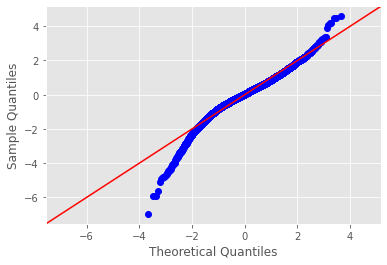

In [23]:
test(df_final, 'price')

In [24]:
# cross valiation
def cross_valiation(df, response):
    X = df_final.drop(columns=[response])
    y = df_final[response]
    mse = make_scorer(mean_squared_error)
    linreg = LinearRegression()
    cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
    return cv_5_results.mean()

In [25]:
#cross_valiation(df_final, 'price')

In [26]:
m = build_model(df_final, 'price')
print('Mean Residuals is: {}'.format(m.resid.abs().mean()))
m.summary()

Mean Residuals is: 59718.75468026469


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     474.0
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:41:09   Log-Likelihood:            -1.2742e+05
No. Observations:               10013   AIC:                         2.550e+05
Df Residuals:                    9935   BIC:                         2.556e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.026e+06   9.91e+04     10.351      0.000    8.32e+05    1.22e+06
sqft_lot           3.4455      0.381      9.043      0.000       2.699       4.192
sqft_living15     76.1879      2.639     28.871      0.000      71.015      81.361
bedrooms        1.911e+04   1298.605     14.712      0.000    1.66e+04    2.17e+04
bathrooms       3.598e+04   2063.902     17.431      0.000    3.19e+04       4e+04
floors          8309.2549   2473.675      3.359      0.001    3460.351    1.32e+04
condition       2.368e+04   1435.473     16.498      0.000    2.09e+04    2.65e+04
grade           5.862e+04   1604.126     36.545      0.000    5.55e+04    6.18e+04
yr_built        -799.6154     50.553    -15.817      0.000    -898.710    -700.521
basement_exist  4075.1012   2106.457      1.935      0.053     -53.982    8204.185
zip_98002       2.068e+04   9538.971      2.168      0.030    1978.048    3.94e+04
zip_98003       -134.8511   8800.185     -0.015      0.988   -1.74e+04    1.71e+04
zip_98004       4.937e+05   1.14e+04     43.263      0.000    4.71e+05    5.16e+05
zip_98005       3.376e+05   1.15e+04     29.236      0.000    3.15e+05     3.6e+05
zip_98006       2.463e+05   8945.514     27.536      0.000    2.29e+05    2.64e+05
zip_98007       2.338e+05   1.14e+04     20.552      0.000    2.12e+05    2.56e+05
zip_98008       2.219e+05   9045.042     24.538      0.000    2.04e+05     2.4e+05
zip_98010       7.888e+04   2.14e+04      3.692      0.000     3.7e+04    1.21e+05
zip_98011        1.46e+05   1.02e+04     14.263      0.000    1.26e+05    1.66e+05
zip_98014       1.295e+05   2.66e+04      4.869      0.000    7.74e+04    1.82e+05
zip_98019       9.839e+04   1.14e+04      8.659      0.000    7.61e+04    1.21e+05
zip_98022       1.164e+04   1.13e+04      1.034      0.301   -1.04e+04    3.37e+04
zip_98023      -1.702e+04   7885.335     -2.158      0.031   -3.25e+04   -1562.650
zip_98024       1.582e+05   2.44e+04      6.474      0.000     1.1e+05    2.06e+05
zip_98027       2.158e+05   9843.690     21.922      0.000    1.96e+05    2.35e+05
zip_98028       1.323e+05   8988.284     14.716      0.000    1.15e+05     1.5e+05
zip_98029       2.279e+05   8728.218     26.114      0.000    2.11e+05    2.45e+05
zip_98030       8197.7495   8927.382      0.918      0.358   -9301.730    2.57e+04
zip_98031       8307.5993   8780.669      0.946      0.344   -8904.292    2.55e+04
zip_98032      -5559.5735   1.11e+04     -0.500      0.617   -2.73e+04    1.62e+04
zip_98033       2.953e+05   8653.712     34.118      0.000    2.78e+05    3.12e+05
zip_98034       1.799e+05   7713.217     23.327      0.000    1.65e+05    1.95e+05
zip_98038       4.701e+04   7753.886      6.062      0.000    3.18e+04    6.22e+04
zip_98039        5.48e+05   4.76e+04     11.513      0.000    4.55e+05    6.41e+05
zip_98040   

### Model 2: Log transformations and Standardize

### Log transformations

In [27]:
def log(df):
    log_names = [f'{column}_log' for column in df.columns]

    df_log = np.log(df_cont)
    df_log.columns = log_names
#    df_log.hist(figsize=(10, 10), bins='auto')
#    plt.show()
    return df_log

In [28]:
df_log = log(df_cont)

### Standardize

In [29]:
# create a normalize function that apply to each feature
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_nor = df_log.apply(normalize)
df_int_nor = df_int.apply(normalize)
#df_log_nor.hist(figsize  = [8, 8]);

In [30]:
# concat the transfromation features with other features and this will be our new transformation data
df_final = pd.concat([df['price'], df_log_nor, df_int_nor, df_cat, zip_dummies], axis=1)
df_final.head()

,price,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log,bedrooms,bathrooms,floors,condition,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,604000.0,0.461458,-0.275873,-0.940504,-0.843427,-0.321650,0.981171,1.613506,-0.828840,2.368737,...,0,0,0,0,0,0,0,0,0,0
1,510000.0,0.002613,0.519625,0.444141,0.233364,0.418966,-0.319394,0.063283,-0.828840,-0.663888,...,0,0,0,0,0,0,0,0,0,0
2,229500.0,0.174719,0.389521,-0.940504,0.190441,0.561600,-0.319394,-1.486940,-0.828840,-0.663888,...,1,0,0,0,0,0,0,0,0,0
3,323000.0,0.353206,0.174211,0.791133,1.322466,0.435189,-0.319394,0.838395,0.996759,-0.663888,...,0,0,0,0,0,0,0,0,0,0
4,468000.0,-1.099840,0.026315,-1.528569,-0.929116,0.011048,-1.619958,-1.486940,-0.828840,0.852424,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# vif
drop_high_vif(df_final, 3.5, 'price')

Train Mean Squared Error: 6673004860.434965
Test Mean Squared Error: 6304550879.062024


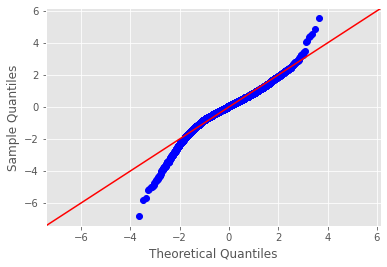

In [32]:
test(df_final, 'price')

In [33]:
#cross_valiation(df_final, 'price_log')

In [34]:
m = build_model(df_final, 'price')
print('Mean Residuals is: {}'.format(m.resid.abs().mean()))
m.summary()

Mean Residuals is: 59705.069439783256


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     477.3
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:            -1.2739e+05
No. Observations:               10013   AIC:                         2.549e+05
Df Residuals:                    9935   BIC:                         2.555e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.564e+05   6286.408     40.787      0.000    2.44e+05    2.69e+05
sqft_living15_log  2.791e+04   1212.890     23.015      0.000    2.55e+04    3.03e+04
sqft_lot15_log     2.349e+04   1395.761     16.826      0.000    2.07e+04    2.62e+04
bedrooms           1.365e+04    999.847     13.651      0.000    1.17e+04    1.56e+04
bathrooms          2.272e+04   1331.981     17.056      0.000    2.01e+04    2.53e+04
floors             1.099e+04   1418.046      7.749      0.000    8209.225    1.38e+04
condition          1.509e+04    943.725     15.991      0.000    1.32e+04    1.69e+04
grade              4.711e+04   1235.524     38.129      0.000    4.47e+04    4.95e+04
yr_built          -2.059e+04   1488.991    -13.831      0.000   -2.35e+04   -1.77e+04
basement_exist     7586.7514   2126.602      3.568      0.000    3418.180    1.18e+04
zip_98002          2.456e+04   9513.800      2.581      0.010    5910.208    4.32e+04
zip_98003          -208.8219   8775.352     -0.024      0.981   -1.74e+04     1.7e+04
zip_98004          5.025e+05   1.14e+04     44.130      0.000     4.8e+05    5.25e+05
zip_98005           3.46e+05   1.15e+04     30.043      0.000    3.23e+05    3.69e+05
zip_98006          2.529e+05   8915.381     28.364      0.000    2.35e+05     2.7e+05
zip_98007          2.389e+05   1.13e+04     21.046      0.000    2.17e+05    2.61e+05
zip_98008          2.259e+05   9025.026     25.034      0.000    2.08e+05    2.44e+05
zip_98010          6.991e+04   2.13e+04      3.280      0.001    2.81e+04    1.12e+05
zip_98011           1.49e+05   1.02e+04     14.598      0.000    1.29e+05    1.69e+05
zip_98014          1.355e+05   2.65e+04      5.109      0.000    8.35e+04    1.87e+05
zip_98019          1.015e+05   1.13e+04      8.964      0.000    7.93e+04    1.24e+05
zip_98022          1.033e+04   1.12e+04      0.921      0.357   -1.17e+04    3.23e+04
zip_98023          -1.53e+04   7862.323     -1.946      0.052   -3.07e+04     108.876
zip_98024          1.547e+05   2.44e+04      6.345      0.000    1.07e+05    2.03e+05
zip_98027          2.326e+05   9884.297     23.535      0.000    2.13e+05    2.52e+05
zip_98028          1.366e+05   8964.020     15.237      0.000    1.19e+05    1.54e+05
zip_98029          2.378e+05   8723.422     27.257      0.000    2.21e+05    2.55e+05
zip_98030          9668.8523   8903.977      1.086      0.278   -7784.749    2.71e+04
zip_98031          9283.7733   8756.529      1.060      0.289   -7880.799    2.64e+04
zip_98032         -4490.5775   1.11e+04     -0.405      0.685   -2.62e+04    1.72e+04
zip_98033          2.967e+05   8629.848     34.382      0.000     2.8e+05    3.14e+05
zip_98034          1.812e+05   7691.399     23.553      0.000    1.66e+05    1.96e+05
zip_98038          5.073e+04   7727.200      6.566      0.000    3.56e+04

### Model 3: Log transformation and Min-max Scaling

### Min-max Scaling

In [35]:
# create a min-max scaling function that apply to each feature
def minmax(feature):
    return (feature-feature.min()) / (feature.max()-feature.min())

df_log_mm = df_log.apply(minmax)
df_int_mm = df_int.apply(minmax)

In [36]:
# concat the transfromation features with other features and this will be our new transformation data
df_final = pd.concat([df['price'], df_log_mm, df_cat, df_int_mm, zip_dummies], axis=1)
df_final.head()

,price,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log,basement_exist,bedrooms,bathrooms,floors,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,604000.0,0.642951,0.640013,0.419627,0.496131,0.654589,1.0,0.666667,0.714286,0.0,...,0,0,0,0,0,0,0,0,0,0
1,510000.0,0.563837,0.775730,0.671589,0.673168,0.785691,0.0,0.333333,0.428571,0.0,...,0,0,0,0,0,0,0,0,0,0
2,229500.0,0.593511,0.753533,0.419627,0.666111,0.810940,1.0,0.333333,0.142857,0.0,...,1,0,0,0,0,0,0,0,0,0
3,323000.0,0.624286,0.716800,0.734731,0.852230,0.788563,0.0,0.333333,0.571429,0.4,...,0,0,0,0,0,0,0,0,0,0
4,468000.0,0.373751,0.691568,0.312617,0.482043,0.713482,1.0,0.000000,0.142857,0.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
drop_high_vif(df_final, 3.5, 'price')

Train Mean Squared Error: 6587232865.491896
Test Mean Squared Error: 6655927970.392887


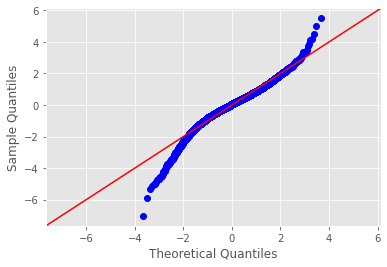

In [38]:
test(df_final, 'price')

In [39]:
#cross_valiation(df_final, 'price_log')

In [40]:
m = build_model(df_final, 'price')
print('Mean Residuals is: {}'.format(m.resid.abs().mean()))
m.summary()

Mean Residuals is: 59705.06943978331


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     477.3
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:42:02   Log-Likelihood:            -1.2739e+05
No. Observations:               10013   AIC:                         2.549e+05
Df Residuals:                    9935   BIC:                         2.555e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -9.283e+04   1.06e+04     -8.737      0.000   -1.14e+05    -7.2e+04
sqft_living15_log  1.698e+05   7377.134     23.015      0.000    1.55e+05    1.84e+05
sqft_lot15_log     1.327e+05   7884.861     16.826      0.000    1.17e+05    1.48e+05
basement_exist     7586.7514   2126.602      3.568      0.000    3418.180    1.18e+04
bedrooms           5.326e+04   3901.097     13.651      0.000    4.56e+04    6.09e+04
bathrooms          1.233e+05   7227.036     17.056      0.000    1.09e+05    1.37e+05
floors             5.015e+04   6471.957      7.749      0.000    3.75e+04    6.28e+04
condition          6.865e+04   4292.949     15.991      0.000    6.02e+04    7.71e+04
grade              1.812e+05   4753.027     38.129      0.000    1.72e+05    1.91e+05
yr_built          -8.108e+04   5862.203    -13.831      0.000   -9.26e+04   -6.96e+04
zip_98002          2.456e+04   9513.800      2.581      0.010    5910.208    4.32e+04
zip_98003          -208.8219   8775.352     -0.024      0.981   -1.74e+04     1.7e+04
zip_98004          5.025e+05   1.14e+04     44.130      0.000     4.8e+05    5.25e+05
zip_98005           3.46e+05   1.15e+04     30.043      0.000    3.23e+05    3.69e+05
zip_98006          2.529e+05   8915.381     28.364      0.000    2.35e+05     2.7e+05
zip_98007          2.389e+05   1.13e+04     21.046      0.000    2.17e+05    2.61e+05
zip_98008          2.259e+05   9025.026     25.034      0.000    2.08e+05    2.44e+05
zip_98010          6.991e+04   2.13e+04      3.280      0.001    2.81e+04    1.12e+05
zip_98011           1.49e+05   1.02e+04     14.598      0.000    1.29e+05    1.69e+05
zip_98014          1.355e+05   2.65e+04      5.109      0.000    8.35e+04    1.87e+05
zip_98019          1.015e+05   1.13e+04      8.964      0.000    7.93e+04    1.24e+05
zip_98022          1.033e+04   1.12e+04      0.921      0.357   -1.17e+04    3.23e+04
zip_98023          -1.53e+04   7862.323     -1.946      0.052   -3.07e+04     108.876
zip_98024          1.547e+05   2.44e+04      6.345      0.000    1.07e+05    2.03e+05
zip_98027          2.326e+05   9884.297     23.535      0.000    2.13e+05    2.52e+05
zip_98028          1.366e+05   8964.020     15.237      0.000    1.19e+05    1.54e+05
zip_98029          2.378e+05   8723.422     27.257      0.000    2.21e+05    2.55e+05
zip_98030          9668.8523   8903.977      1.086      0.278   -7784.749    2.71e+04
zip_98031          9283.7733   8756.529      1.060      0.289   -7880.799    2.64e+04
zip_98032         -4490.5775   1.11e+04     -0.405      0.685   -2.62e+04    1.72e+04
zip_98033          2.967e+05   8629.848     34.382      0.000     2.8e+05    3.14e+05
zip_98034          1.812e+05   7691.399     23.553      0.000    1.66e+05    1.96e+05
zip_98038          5.073e+04   7727.200      6.566      0.000    3.56e+04